In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Загрузим уже обработанные в прошлом ДЗ данные!

In [20]:
df = pd.read_csv('processed_sigma.csv')
df = df.drop("Trip_ID", axis=1)

X = df.drop("Surge_Pricing_Type", axis=1)
y = df["Surge_Pricing_Type"]

### Principal component analysis (PCA)

**Задание 1.** Спроецируйте данные на двумерную плоскость, используя `PCA`. Другими словами, выделите первые две главные компоненты и изобразите данные в осях этих компонент. Не забудьте центрировать признаки перед применением метода. 

**Какую долю изначальной дисперсии (информации) содержат/объясняют в себе обе компоненты?** Для этого воспользуйтесь атрибутом `explained_variance_ratio_` у PCA-класса.

In [21]:
### Центрируем данные

### Your code is here
from sklearn.decomposition import PCA

X_centered = X - X.mean()

pca = PCA(n_components=2)

PCA_dataset = pca.fit_transform(X_centered)

PCA_dataset = pd.DataFrame(PCA_dataset, columns=['PCA_1', 'PCA_2'])

PCA_dataset.head()

,PCA_1,PCA_2
0,-38.743132,-23.282634
1,-13.209252,-25.023815
2,-2.004910,-1.637085
3,17.178458,-0.907657
4,14.477389,-11.656752


In [22]:
# Какую долю изначальной дисперсии (информации) содержат/объясняют в себе обе компоненты

pca.explained_variance_ratio_

array([0.63176117, 0.21129863])

In [23]:
### Сконкатим с таргетом

PCA_dataset = np.concatenate((PCA_dataset.values, y.values.reshape(-1, 1)),
                              axis=1)

PCA_dataset = pd.DataFrame(PCA_dataset, columns=['PCA1', 'PCA2', 'Surge_Pricing_Type'])

<Axes: xlabel='PCA1', ylabel='PCA2'>

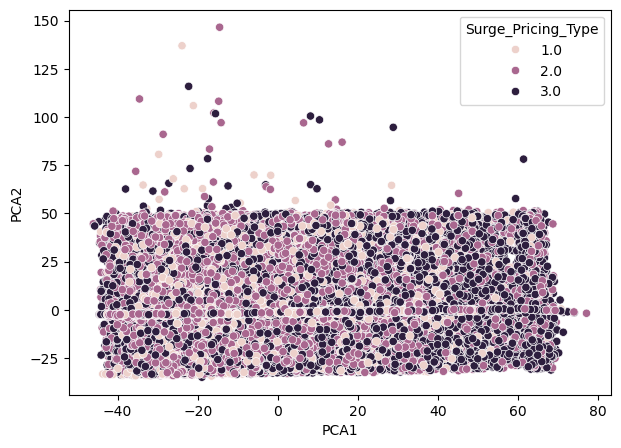

In [24]:
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(7, 5)
    
sns.scatterplot(data=PCA_dataset, x="PCA1", y="PCA2", hue="Surge_Pricing_Type")

**Задание 2.** Изобразите heatmap корреляции изначальных признаков с новыми двумя главными компонентами. \
**Какие признаки коррелируют с первой компонентой? Какие со второй? В качестве порогового значения договоримся о корреляции >= 0.5 по абсолютному значению **


In [25]:
### Your code is here
first_component_corr = X.corrwith(PCA_dataset.PCA1)
second_component_corr = X.corrwith(PCA_dataset.PCA2)

corrs = pd.concat((first_component_corr, second_component_corr),
                  axis=1)

corrs.columns = ['PCA1', 'PCA2']

corrs

,PCA1,PCA2
Trip_Distance,0.997767,0.018410
Customer_Since_Months,0.121591,0.003500
Life_Style_Index,0.480658,-0.025901
Customer_Rating,-0.070104,-0.003757
Cancellation_Last_1Month,0.000803,0.008960
Var1,-0.048532,0.998600
Var2,0.247178,-0.028448
Var3,0.293819,-0.026583
Type_of_Cab_B,-0.048751,0.005723
Type_of_Cab_C,-0.012059,-0.003397


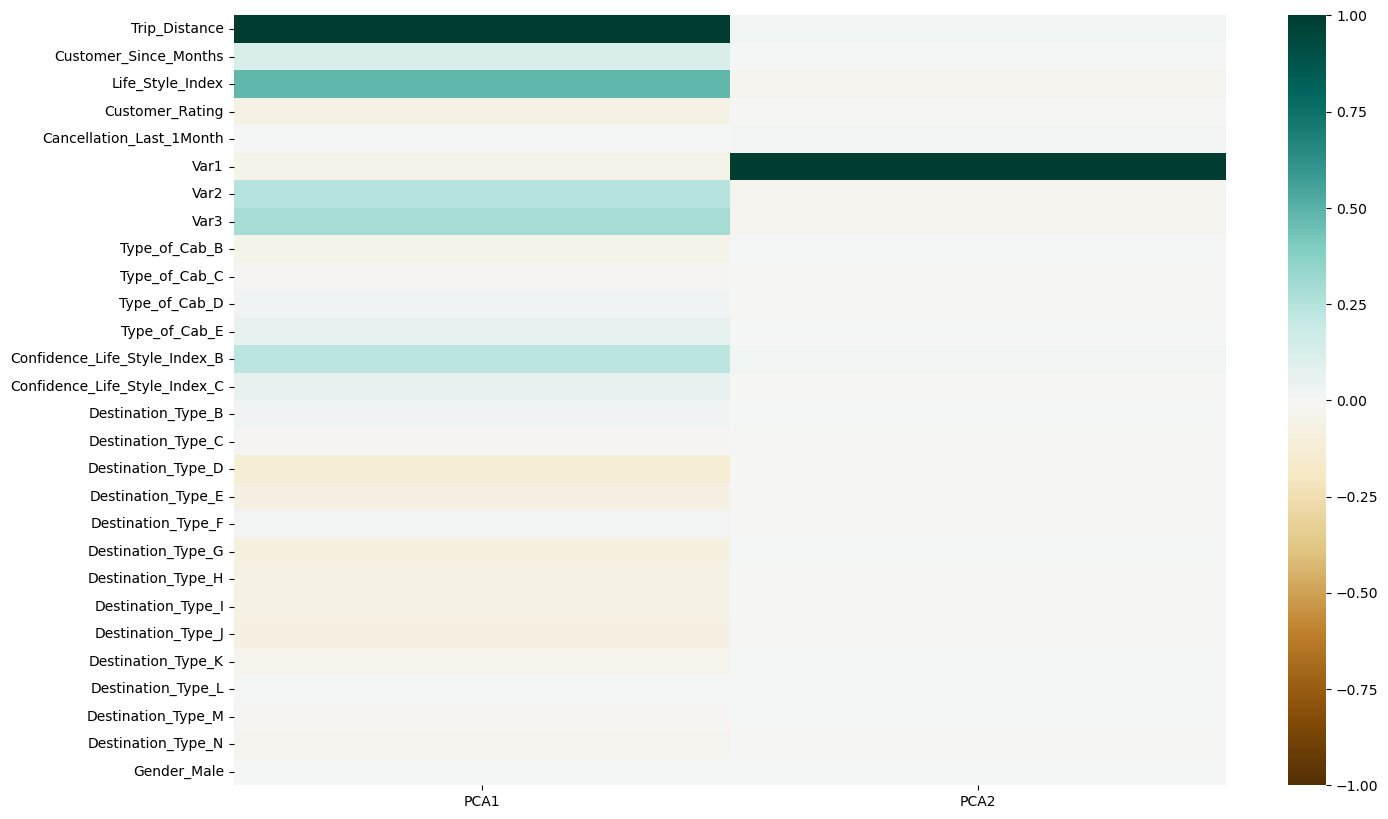

In [26]:
import seaborn as sns

fig = plt.figure()

fig.set_size_inches(16, 10)

sns.heatmap(corrs, 
            xticklabels=corrs.columns,
            yticklabels=corrs.index,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()

**Задание 3.** Изобразите двумерную проекцию данных с метками классов. Выделите третью главную компоненту и аналогично нарисуйте трехмерную проекцию с метками классов. \
**Какие признаки коррелируют с третьей компонентой?**

In [27]:
### Your code is here

pca_3d = PCA(n_components=3)

pca_3d.fit(X_centered)

PCA_dataset_3d = pca_3d.transform(X_centered)

PCA_dataset_3d = pd.DataFrame(PCA_dataset_3d, columns=['PCA_1', 'PCA_2', 'PCA_3'])

PCA_dataset_3d.head()

,PCA_1,PCA_2,PCA_3
0,-38.743132,-23.282634,-11.303274
1,-13.209252,-25.023815,5.664106
2,-2.004910,-1.637085,3.663032
3,17.178458,-0.907657,-3.191676
4,14.477389,-11.656752,22.999348


In [28]:
### Сконкатим с таргетом

PCA_dataset_3d = np.concatenate((PCA_dataset_3d.values, y.values.reshape(-1, 1)),
                                 axis=1)

PCA_dataset_3d = pd.DataFrame(PCA_dataset_3d, columns=['PCA_1', 'PCA_2', 'PCA_3', 'Surge_Pricing_Type'])

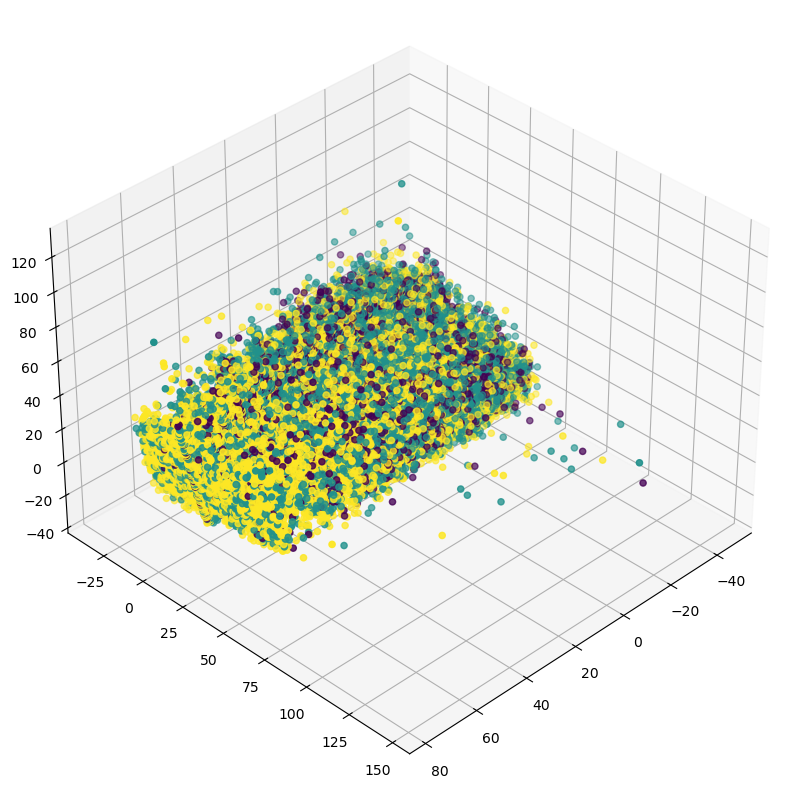

In [29]:
fig = plt.figure()
fig.set_size_inches(16, 10)

ax = plt.axes(projection='3d')

colors = PCA_dataset_3d['Surge_Pricing_Type'].replace(['1', '2', '3'],
                                            ['orange', 'green', 'red'])

ax.scatter3D(PCA_dataset_3d['PCA_1'], 
             PCA_dataset_3d['PCA_2'],
             PCA_dataset_3d['PCA_3'], 
             c=colors)
ax.view_init(elev=35, azim=45)  
plt.show()

Советуем еще и замерить попарные корреляции между главными компонентами! Это поможет в ответе на один из тестовых вопросов.

In [30]:
### Your code is here

first_component_corr_3d = X.corrwith(PCA_dataset_3d.PCA_1)
second_component_corr_3d = X.corrwith(PCA_dataset_3d.PCA_2)
third_component_corr_3d = X.corrwith(PCA_dataset_3d.PCA_3)

corrs_3d = pd.concat((first_component_corr_3d, 
                      second_component_corr_3d, 
                      third_component_corr_3d), axis=1)

corrs_3d.columns = ['PCA_1', 'PCA_2', 'PCA_3']

corrs_3d

,PCA_1,PCA_2,PCA_3
Trip_Distance,0.997767,0.018410,-0.064176
Customer_Since_Months,0.121591,0.003500,0.081370
Life_Style_Index,0.480658,-0.025901,0.166688
Customer_Rating,-0.070104,-0.003757,-0.236793
Cancellation_Last_1Month,0.000803,0.008960,0.136222
Var1,-0.048532,0.998600,0.021003
Var2,0.247178,-0.028448,0.705159
Var3,0.293819,-0.026583,0.951081
Type_of_Cab_B,-0.048751,0.005723,0.011211
Type_of_Cab_C,-0.012059,-0.003397,-0.008707


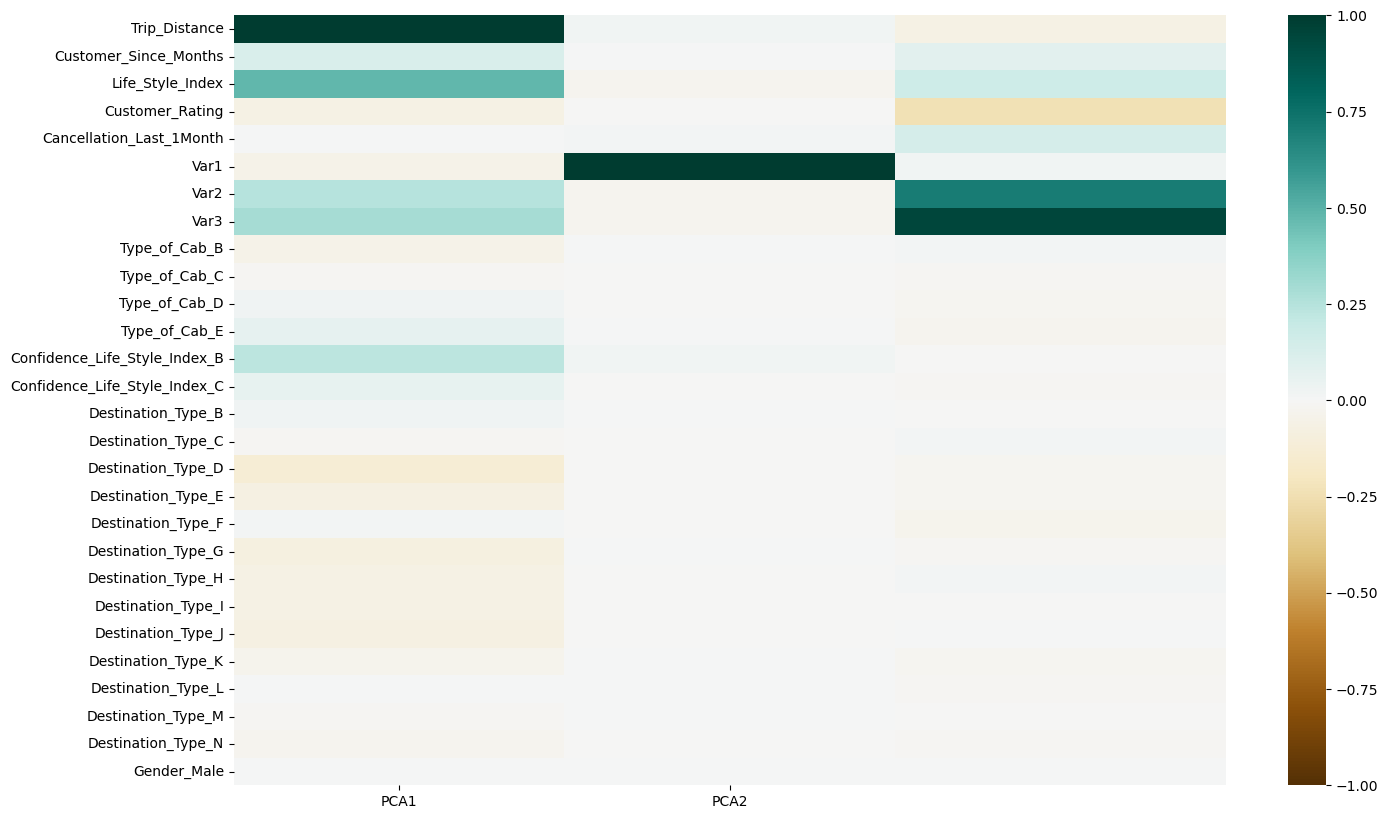

In [31]:
fig = plt.figure()

fig.set_size_inches(16, 10)

sns.heatmap(corrs_3d, 
            xticklabels=corrs.columns,
            yticklabels=corrs.index,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()

**Задание 4.** Обучите логистическую регрессию на первых двух компонентах центрированных данных и подберите гиперпараметры. Обучите логистическую регрессию на центрированных данных и подберите гиперпараметры. **Сравните метрику accuracy и f1-score на тестовой выборке в двух моделях**.

P.S. для удобства, скорости и нормализации данных (понадобится, так как захотим повалидироваться на параметрах регуляризации) можно построить конструкцию Pipeline c 3 следующими степами: StandardScaler -> PCA -> LogisticRegression

In [32]:
np.random.seed(2022)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [34]:
### Your code is here

param_grid = {'model__penalty': ['l1', 'l2', 'elasticnet'],
              'model__C': [1e-5, 0.0001, 0.001, 0.01]}


In [35]:
pipe = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2)), ('model', LogisticRegression())])

In [36]:
# Обучите логистическую регрессию на первых двух компонентах центрированных данных и подберите гиперпараметры

search = GridSearchCV(estimator = pipe, param_grid = param_grid)

search.fit(X_train, y_train)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=0.48074):
{'model__C': 0.0001, 'model__penalty': 'l2'}


In [37]:
best_model = search.best_estimator_

In [38]:
print(classification_report(y_test, best_model.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.000     0.000     0.000      5372
           2      0.479     0.692     0.566     11349
           3      0.494     0.509     0.501      9612

    accuracy                          0.484     26333
   macro avg      0.324     0.401     0.356     26333
weighted avg      0.386     0.484     0.427     26333



In [39]:
# Обучите логистическую регрессию на центрированных данных и подберите гиперпараметры

search = GridSearchCV(estimator =  Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())]), param_grid = param_grid)

search.fit(X_train, y_train)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=0.68042):
{'model__C': 0.01, 'model__penalty': 'l2'}


In [40]:
best_model = search.best_estimator_

In [41]:
print(classification_report(y_test, best_model.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.737     0.538     0.622      5372
           2      0.637     0.826     0.719     11349
           3      0.735     0.588     0.653      9612

    accuracy                          0.680     26333
   macro avg      0.703     0.651     0.665     26333
weighted avg      0.693     0.680     0.675     26333



Кажется, достаточно сильно теряем в качестве! Может, добавить компонент?

In [42]:
### Чтобы не заставлять вас писать похожий на предыдущий код,
### Написали функцию, которая будет обучать модель для
### произвольного числа n_components главных компонент.

def train_pca_i(n_components, X_train, y_train):
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('pca', PCA(n_components=n_components)),
                     ('model', LogisticRegression(penalty='l2', solver='saga',random_state=1))])
    
    param_grid = {'model__C': [0.0001, 0.001, 0.01, 0.1]}
    
    grid = GridSearchCV(pipe, param_grid, cv=5)
    grid.fit(X_train, y_train)
    
    report = classification_report(y_test, grid.predict(X_test), output_dict=True)
    return (report['accuracy'], 
            report['weighted avg']['f1-score'])

**Задание 5.** Обучите модели логистической регресии на нескольких различных компонентах: [2, 4, 8, 16, 28]. **Нарисуйте графики зависимости accuracy, f1-score от количества компонент. Введите их значения через запятую**. При обучении используйте l2-регуляризацию, гиперпараметр C подбирайте по сетке. 


In [46]:
%%time
accuracy_dict, f1_score_dict = {}, {}
components_list = [2, 4, 8, 16, 28]

for n_components in components_list:
    
    ### Your code is here
    accuracy_dict[n_components] = train_pca_i(n_components, X_train, y_train)[0]
    f1_score_dict[n_components] = train_pca_i(n_components, X_train, y_train)[1]  

CPU times: user 2min 28s, sys: 5min 32s, total: 8min
Wall time: 56.5 s


In [47]:
accuracy_dict

{2: 0.48429726958569097,
 4: 0.5321839516955911,
 8: 0.5885770705958303,
 16: 0.5922606615273611,
 28: 0.6813883720047089}

In [48]:
f1_score_dict

{2: 0.4269265169630114,
 4: 0.4724230539303479,
 8: 0.5231713579311364,
 16: 0.5273629016033227,
 28: 0.6760757307801638}

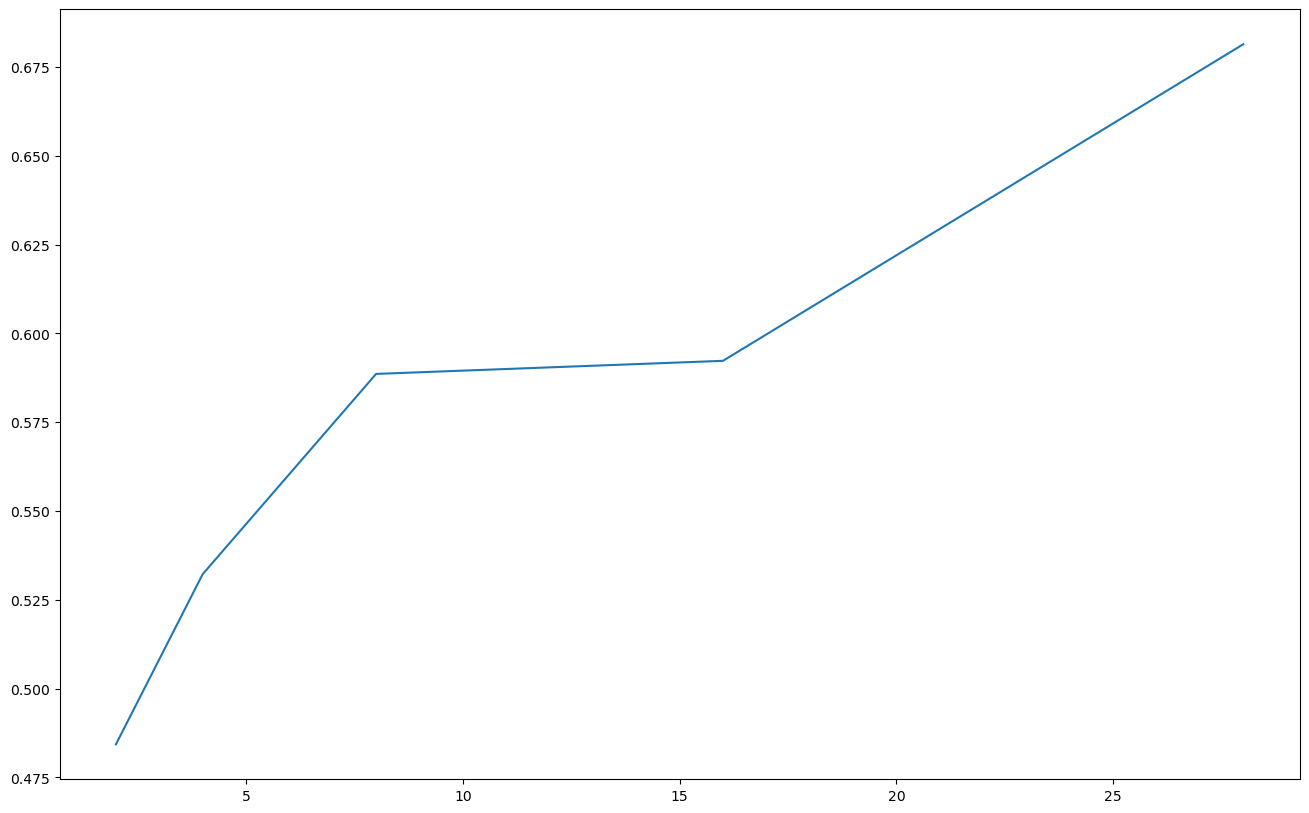

In [49]:
### Изобразим обучающую кривую

fig = plt.figure()
fig.set_size_inches(16, 10)

plt.plot(list(accuracy_dict.keys()), list(accuracy_dict.values()))

plt.show()

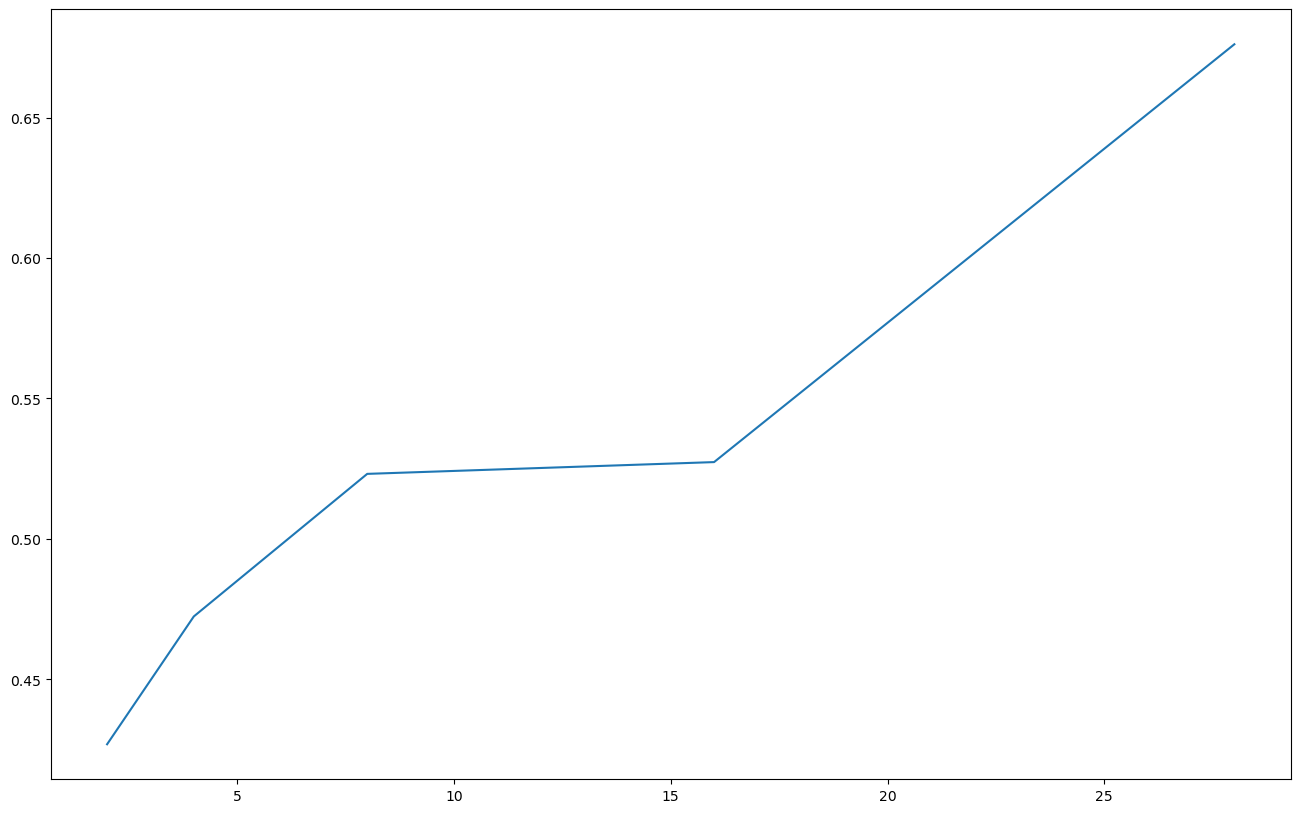

In [50]:
### Изобразим обучающую кривую по времени

fig = plt.figure()
fig.set_size_inches(16, 10)

plt.plot(list(f1_score_dict.keys()), list(f1_score_dict.values()))

plt.show()

Обычно, когда решается какая-то высокоразмерная предсказательная задача, где тысячи признаков, функция качества PCA моделей похожа на параболу ветвями вниз в зависимости от количества компонент (для совсем маленьких и больших n_component качество маленькое, при этом есть где-то промежуточное значение).

Как думаете, почему здесь у нас непрерывно растущие графики качества?

Может, изначальные признаки были слишком хороши?

### t-SNE

Напомним, что метод заключается в введении некоторых функций, основанных на расстоянии между признаками, которые измеряют близость объектов. Функций, как вы помните, две, и они заданы в исходном и новом пространствах соотвественно. Далее минимизируем дивергенцию Кульбака-Лейблера по координатaм в новом пространстве

**Задание 6.** Обучите t-sne c `n_components=2` на изначальных данных и визуализируйте результаты с учетом известных классов. 

P.S. если устанете ждать обучения TSNE, или упадет ошибка по типу oom, то можно сократить число объектов в датасете до, например, пары тысяч. Это и следующее задания никак проверяться системой не будут. Вам достаточно повторить упражнение с практики и получить какое-то более адекватное (по сравнению с PCA) изображение классов.

In [52]:
from sklearn.manifold import TSNE

### Your code is here

X_tsne = TSNE(n_components=2).fit_transform(X_centered)

X_tsne

array([[ -60.14279   , -101.923454  ],
       [  -6.2544837 ,  -93.79325   ],
       [   4.462437  ,  -18.337896  ],
       ...,
       [  -6.966441  ,    0.42478484],
       [  22.22339   ,  -82.53449   ],
       [  -4.1837497 ,   98.46182   ]], dtype=float32)

In [53]:
### Преобразуем в pd.DataFrame

X_tsne = np.concatenate((X_tsne, y.values.reshape(-1, 1)),
                               axis=1)

X_tsne = pd.DataFrame(X_tsne, columns=['Tsne_1st_component',
                                       'Tsne_2nd_component',
                                       'Surge_Pricing_Type'])

<Axes: xlabel='Tsne_1st_component', ylabel='Tsne_2nd_component'>

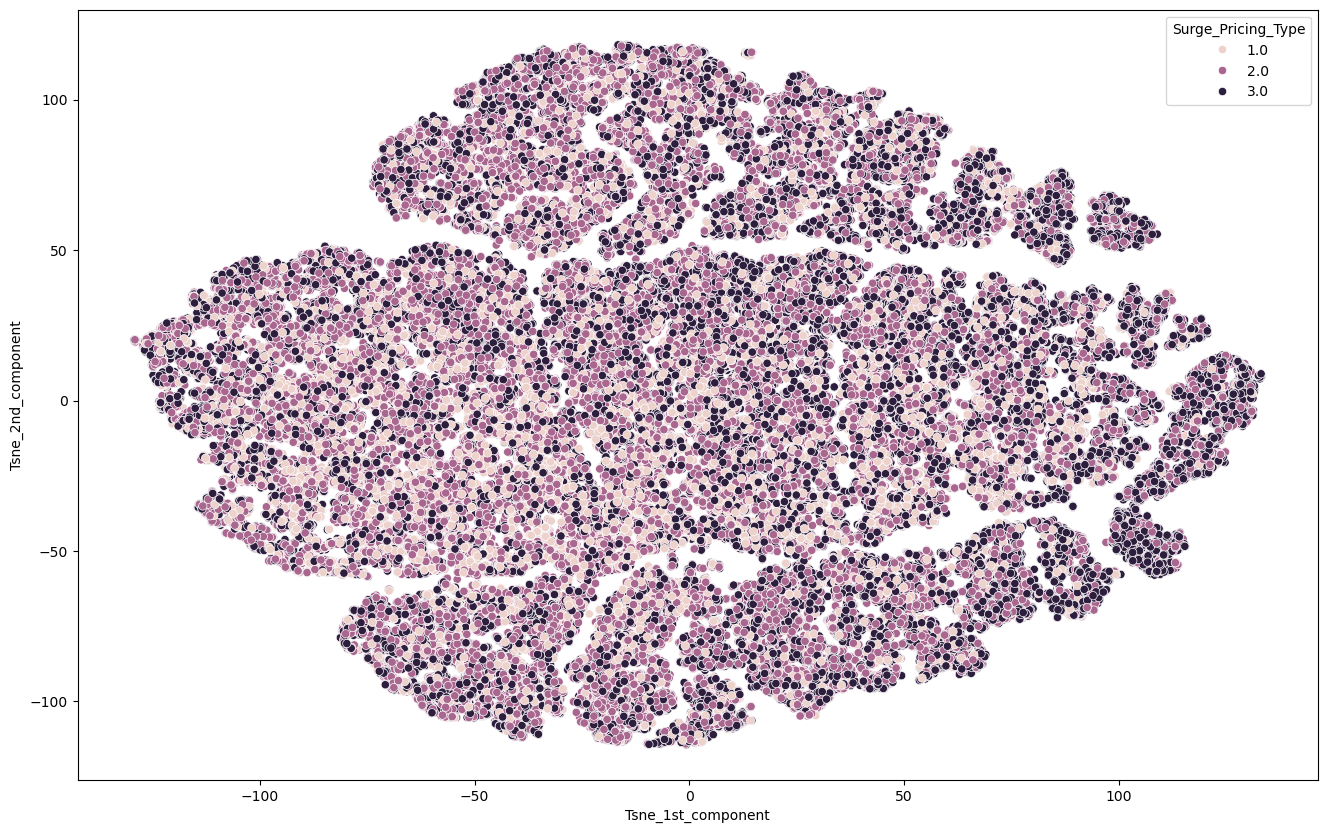

In [54]:
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.scatterplot(data=X_tsne, x="Tsne_1st_component", 
                y="Tsne_2nd_component", 
                hue="Surge_Pricing_Type")

**Задание 7.** Обучите t-sne с `n_components=3` на изначальных данных и визуализируйте результаты с учетом известных классов.

In [55]:
### Your code is here
X_tsne_3d = TSNE(n_components=3).fit_transform(X_centered)

X_tsne_3d

array([[-27.640272  , -29.07987   ,   8.148398  ],
       [-10.211659  , -26.343029  ,   9.455041  ],
       [  0.5094101 ,  -8.903665  ,  -4.5190134 ],
       ...,
       [ -2.1143281 , -14.791781  ,  -6.9228997 ],
       [  6.4402385 , -25.458012  ,  -0.55307716],
       [ -2.8530526 ,  29.610674  ,  11.43687   ]], dtype=float32)

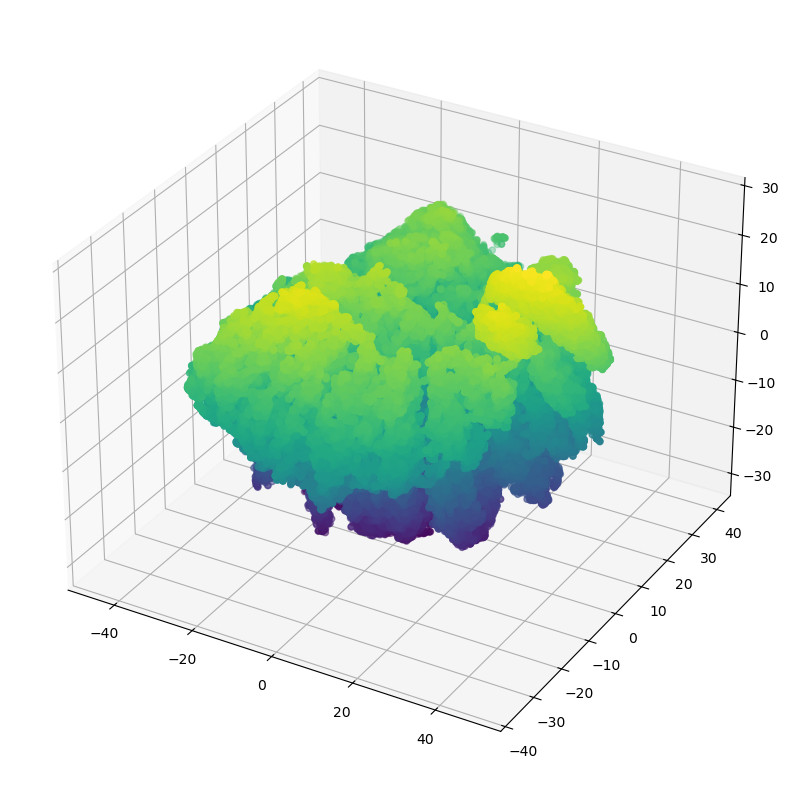

In [56]:
### Преобразуем в pd.DataFrame

X_tsne_3d = np.concatenate((X_tsne_3d, y.values.reshape(-1, 1)),
                               axis=1)

X_tsne_3d = pd.DataFrame(X_tsne_3d, columns=['Tsne_1st_component',
                                             'Tsne_2nd_component',
                                             'Tsne_3rd_component',
                                             'Surge_Pricing_Type'])

fig = plt.figure()
fig.set_size_inches(16, 10)

ax = plt.axes(projection='3d')

colors = X_tsne_3d['Tsne_3rd_component'].replace(['1', '2', '3'],
                                      ['orange', 'green', 'red'])

ax.scatter3D(X_tsne_3d['Tsne_1st_component'], 
             X_tsne_3d['Tsne_2nd_component'],
             X_tsne_3d['Tsne_3rd_component'], 
             c=colors)

Советуем обрезать датасет до маленького числа объектов (чтобы точки и их группки были хорошо различимы) и поиграться с гиперпараметрами класса Tsne! Обычно такая "игра" может привести к куда более красивым результатам по сравнению с теми, что получены с дефолтными настройками!